In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
carData = pd.read_csv("C:/Users/Deonl/Downloads/Mini-project/sgcarmart_used_cars_prices.csv",index_col=0)
carData.sample(5)

,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
229,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,78800.0,11330.0,27-Apr-09,161000.0,2008,2634.0,Auto,22968.0,18/4/2022,36897.0,36897.0,33018.0,2223.0,2693.0,1920.0,3.0,SUV
1498,https://www.sgcarmart.com/used_cars/info.php?I...,Mazda,55800.0,11780.0,26-Feb-16,NaN,2015,1210.0,Auto,31551.0,19/4/2022,20475.0,20665.0,46970.0,1101.0,1998.0,1454.0,2.0,Luxury Sedan
2388,https://www.sgcarmart.com/used_cars/info.php?I...,Mitsubishi,132800.0,23630.0,30-Nov-07,253000.0,2007,1815.0,Manual,28177.0,19/4/2022,33278.0,36606.0,50168.0,2035.0,1998.0,1420.0,NaN,Sports Car
2325,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,98000.0,10690.0,28-Oct-20,13000.0,2020,392.0,Auto,41995.0,19/4/2022,22527.0,13538.0,37334.0,3108.0,996.0,970.0,1.0,SUV
1129,https://www.sgcarmart.com/used_cars/info.php?I...,Mitsubishi,114888.0,13100.0,4-Dec-19,13976.0,2019,684.0,Auto,52923.0,19/4/2022,27043.0,29861.0,40009.0,2769.0,1499.0,1490.0,1.0,SUV


In [3]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2661 entries, 0 to 2660
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LISTING_URL                   2661 non-null   object 
 1   BRAND                         2661 non-null   object 
 2   PRICE                         2653 non-null   float64
 3   DEPRE_VALUE_PER_YEAR          2611 non-null   float64
 4   REG_DATE                      2661 non-null   object 
 5   MILEAGE_KM                    2230 non-null   float64
 6   MANUFACTURED_YEAR             2661 non-null   int64  
 7   ROAD_TAX_PER_YEAR             2642 non-null   float64
 8   TRANSMISSION                  2661 non-null   object 
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2544 non-null   float64
 10  SCRAPE_DATE                   2661 non-null   object 
 11  OMV                           2651 non-null   float64
 12  ARF                           2650 non-null   float64
 13  COE

# Data Preparation

In [4]:
carData.sample(5)

,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
1407,https://www.sgcarmart.com/used_cars/info.php?I...,Nissan,60800.0,15610.0,18-Jun-15,38300.0,2015,1210.0,Auto,39316.0,19/4/2022,21934.0,22708.0,77600.0,1134.0,1997.0,1626.0,1.0,SUV
1719,https://www.sgcarmart.com/used_cars/info.php?I...,BMW,117800.0,12460.0,12-Oct-11,130000.0,2010,2598.0,Auto,54955.0,19/4/2022,72620.0,72620.0,58124.0,3436.0,2979.0,1775.0,6.0,Luxury Sedan
1228,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,96666.0,11330.0,3-Dec-19,18248.0,2019,682.0,Auto,39724.0,19/4/2022,20301.0,20422.0,32000.0,2768.0,1496.0,1191.0,1.0,SUV
1057,https://www.sgcarmart.com/used_cars/info.php?I...,BMW,178988.0,16750.0,28-Jul-21,4700.0,2021,684.0,Auto,81900.0,19/4/2022,39341.0,47078.0,61112.0,3383.0,1499.0,1435.0,1.0,SUV
2324,https://www.sgcarmart.com/used_cars/info.php?I...,Subaru,15800.0,18310.0,28-Feb-08,NaN,2007,2625.0,Manual,4351.0,19/4/2022,17120.0,18832.0,25289.0,8.0,2457.0,1405.0,2.0,Sports Car


In [5]:
carData_clean = carData.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1)
carData_clean.sample(5)

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
1035,Mercedes-Benz,88800.0,15850.0,16-Feb-17,15000.0,2016,740.0,Auto,41089.0,26692.0,24369.0,49751.0,1737.0,1595.0,1425.0,1.0,Hatchback
902,Mercedes-Benz,688000.0,76240.0,1-Jul-19,27800.0,2018,3922.0,Auto,238986.0,169586.0,277255.0,43102.0,2616.0,3982.0,2560.0,3.0,SUV
2090,Honda,185988.0,16780.0,29-Dec-21,99.0,2020,682.0,Auto,99126.0,38827.0,46358.0,88000.0,3534.0,1496.0,1590.0,1.0,SUV
2649,Land,126800.0,12840.0,12-Apr-12,115000.0,2012,1212.0,Auto,79545.0,52517.0,52517.0,80583.0,3285.0,1999.0,1720.0,3.0,SUV
2210,Nissan,52800.0,12590.0,15-Dec-15,NaN,2015,508.0,Auto,29703.0,18454.0,13454.0,57301.0,1310.0,1197.0,1285.0,1.0,SUV


In [6]:
carData_clean.dropna(inplace=True) # Drop NA Values
carData_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2660
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         2057 non-null   object 
 1   PRICE                         2057 non-null   float64
 2   DEPRE_VALUE_PER_YEAR          2057 non-null   float64
 3   REG_DATE                      2057 non-null   object 
 4   MILEAGE_KM                    2057 non-null   float64
 5   MANUFACTURED_YEAR             2057 non-null   int64  
 6   ROAD_TAX_PER_YEAR             2057 non-null   float64
 7   TRANSMISSION                  2057 non-null   object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  2057 non-null   float64
 9   OMV                           2057 non-null   float64
 10  ARF                           2057 non-null   float64
 11  COE_FROM_SCRAPE_DATE          2057 non-null   float64
 12  DAYS_OF_COE_LEFT              2057 non-null   float64
 13  ENG

In [7]:
carData_clean['TRANSMISSION'].value_counts()

Auto      2036
Manual      21
Name: TRANSMISSION, dtype: int64

# Data Visualization

In [8]:
carDataNum = carData_clean.select_dtypes(include = np.float64)
print("Data dims : ", carDataNum.shape) 
carDataNum.info()   # all variables are now float64

Data dims :  (2057, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2660
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRICE                         2057 non-null   float64
 1   DEPRE_VALUE_PER_YEAR          2057 non-null   float64
 2   MILEAGE_KM                    2057 non-null   float64
 3   ROAD_TAX_PER_YEAR             2057 non-null   float64
 4   DEREG_VALUE_FROM_SCRAPE_DATE  2057 non-null   float64
 5   OMV                           2057 non-null   float64
 6   ARF                           2057 non-null   float64
 7   COE_FROM_SCRAPE_DATE          2057 non-null   float64
 8   DAYS_OF_COE_LEFT              2057 non-null   float64
 9   ENGINE_CAPACITY_CC            2057 non-null   float64
 10  CURB_WEIGHT_KG                2057 non-null   float64
 11  NO_OF_OWNERS                  2057 non-null   float64
dtypes: float64(12)
memory usage: 208.9 KB


In [9]:
carSalePrice = pd.DataFrame(carDataNum['PRICE'])
print("Data type : ", type(carSalePrice))
print("Data dims : ", carSalePrice.size)
carSalePrice.describe()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  2057


,PRICE
count,2057.000000
mean,116441.560525
std,103100.033330
min,1088.000000
25%,62888.000000
50%,86800.000000
75%,138888.000000
max,978988.000000


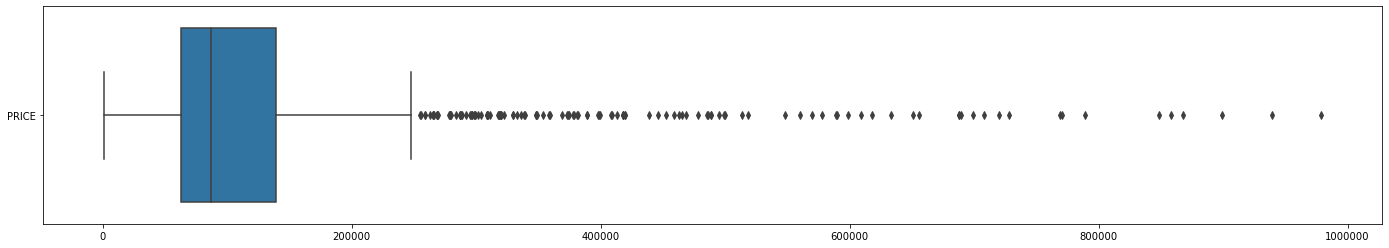

In [10]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = carSalePrice, orient = "h")
plt.ticklabel_format(style='plain', axis='x') # To stop seaborn to display price as expontial

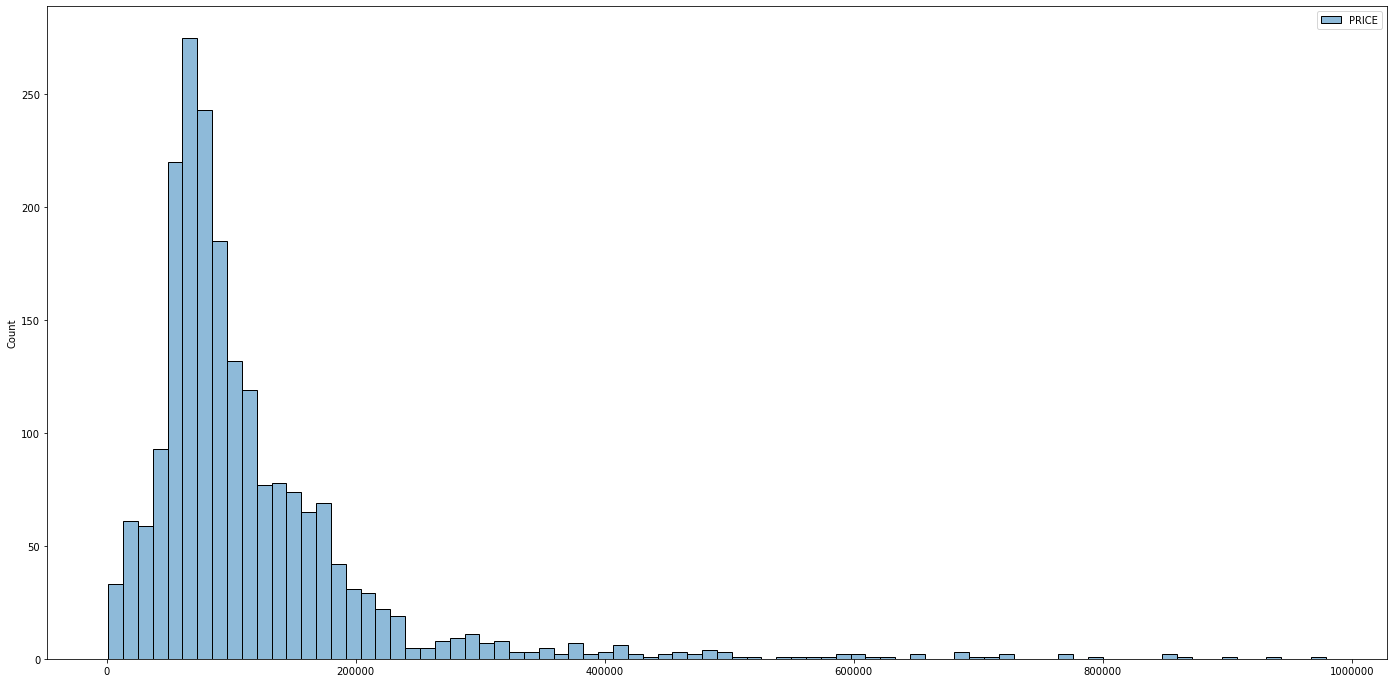

In [11]:
f = plt.figure(figsize=(24, 12))
sb.histplot(data = carSalePrice)
plt.ticklabel_format(style='plain', axis='x') # To stop seaborn to display price as expontial

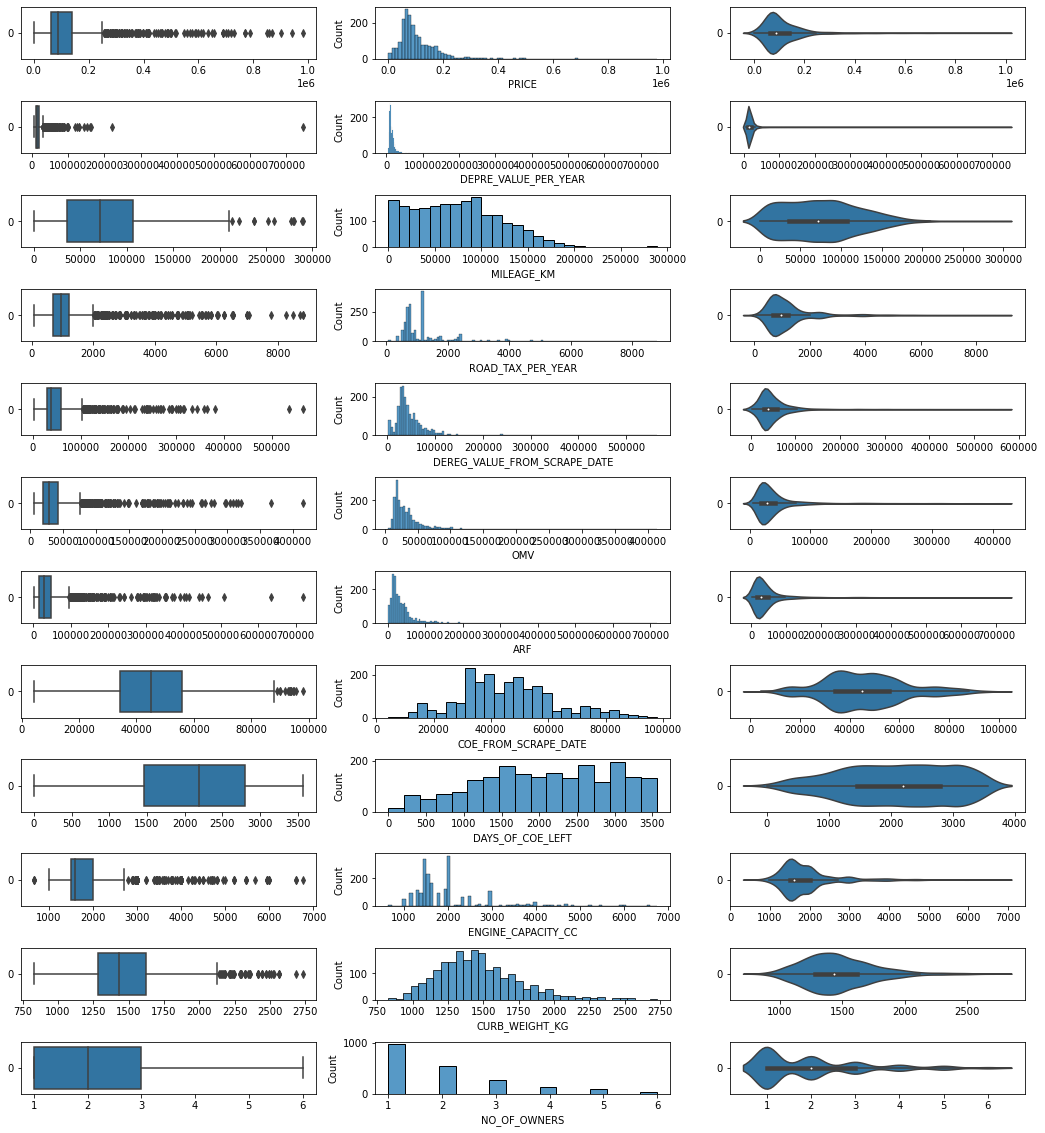

In [12]:
# Draw the distributions of all variables
f, axes = plt.subplots(12, 3, figsize=(18, 20))

count = 0
for var in carDataNum:
    sb.boxplot(data = carDataNum[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = carDataNum[var], ax = axes[count,1])
    sb.violinplot(data = carDataNum[var], orient = "h", ax = axes[count,2])
    count += 1
    
plt.subplots_adjust(hspace = 0.8) # To adjust space between variables so it can be seen clearly

                                 PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  \
PRICE                         1.000000              0.548057   -0.437493   
DEPRE_VALUE_PER_YEAR          0.548057              1.000000   -0.157136   
MILEAGE_KM                   -0.437493             -0.157136    1.000000   
ROAD_TAX_PER_YEAR             0.530140              0.420511    0.081784   
DEREG_VALUE_FROM_SCRAPE_DATE  0.828710              0.531969   -0.426478   
OMV                           0.784165              0.649493   -0.150533   
ARF                           0.812514              0.623358   -0.177598   
COE_FROM_SCRAPE_DATE          0.168517              0.270108   -0.146807   
DAYS_OF_COE_LEFT              0.367141             -0.086599   -0.456600   
ENGINE_CAPACITY_CC            0.595517              0.468092    0.015790   
CURB_WEIGHT_KG                0.548829              0.335113   -0.064184   
NO_OF_OWNERS                 -0.136636              0.057023    0.572627   

           

<AxesSubplot:>

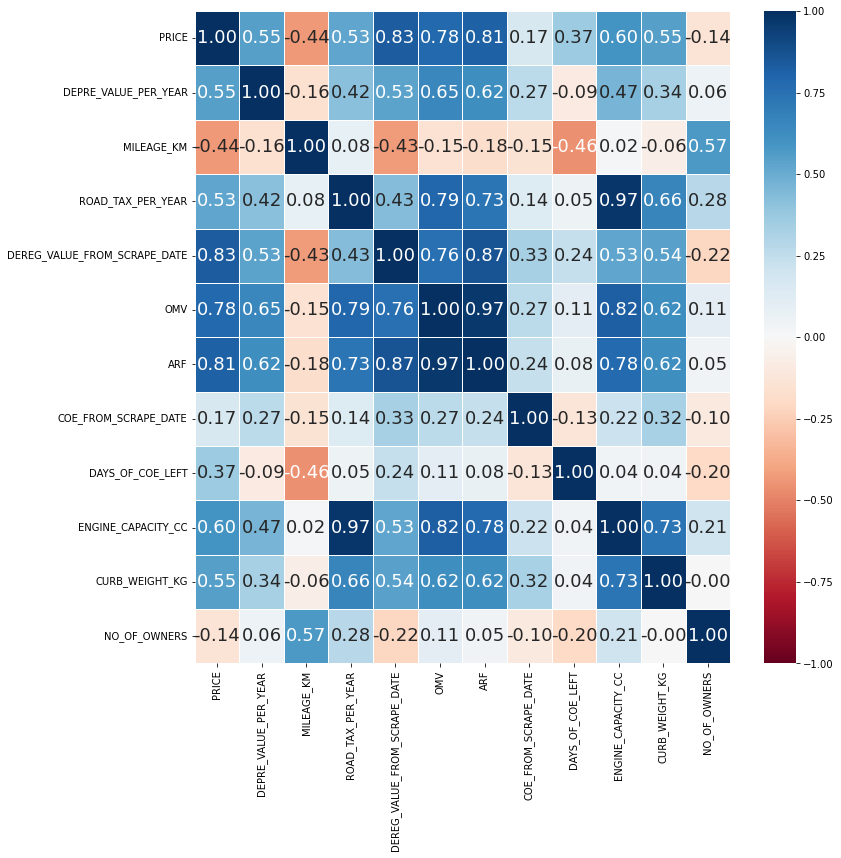

In [13]:
# Correlation Matrix
print(carDataNum.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(carDataNum.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [14]:
carDataNum.corr()['PRICE']

PRICE                           1.000000
DEPRE_VALUE_PER_YEAR            0.548057
MILEAGE_KM                     -0.437493
ROAD_TAX_PER_YEAR               0.530140
DEREG_VALUE_FROM_SCRAPE_DATE    0.828710
OMV                             0.784165
ARF                             0.812514
COE_FROM_SCRAPE_DATE            0.168517
DAYS_OF_COE_LEFT                0.367141
ENGINE_CAPACITY_CC              0.595517
CURB_WEIGHT_KG                  0.548829
NO_OF_OWNERS                   -0.136636
Name: PRICE, dtype: float64

In [15]:
carCatData = pd.DataFrame(carData[['BRAND', 'TRANSMISSION', 'VEHICLE_TYPE']])
carCatData = carCatData.astype('category')
carCatData.head()

,BRAND,TRANSMISSION,VEHICLE_TYPE
0,Lexus,Auto,SUV
1,Nissan,Auto,Hatchback
2,BMW,Auto,Hatchback
3,Bentley,Auto,Sports Car
4,Toyota,Auto,SUV


In [16]:
carCatData = pd.concat([carCatData, carData["PRICE"]], axis = 1).reindex(carCatData.index) # Include PRICE
carCatData.head()

,BRAND,TRANSMISSION,VEHICLE_TYPE,PRICE
0,Lexus,Auto,SUV,150800.0
1,Nissan,Auto,Hatchback,43900.0
2,BMW,Auto,Hatchback,52800.0
3,Bentley,Auto,Sports Car,309000.0
4,Toyota,Auto,SUV,105800.0


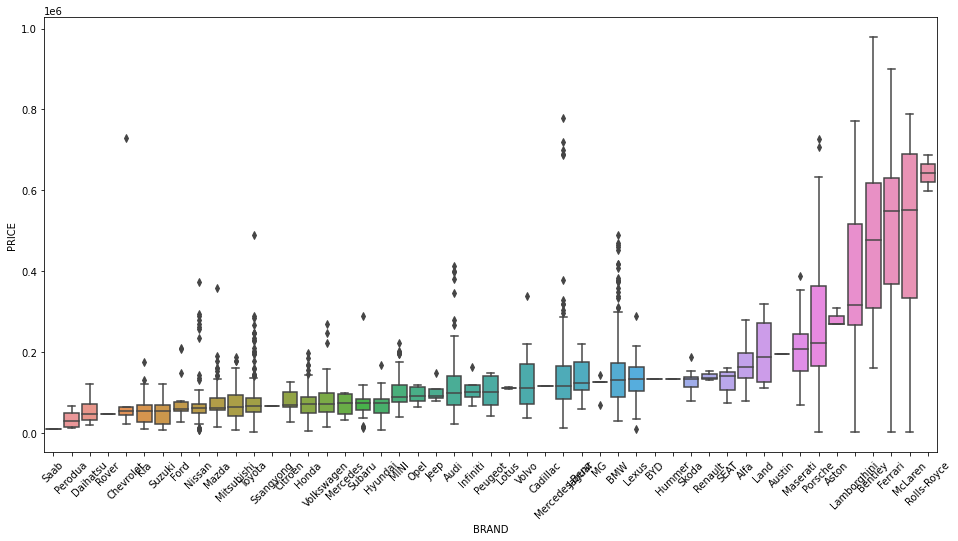

In [17]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'BRAND', y = 'PRICE', data = carCatData, 
           order = carCatData.groupby('BRAND')['PRICE'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

<AxesSubplot:xlabel='VEHICLE_TYPE', ylabel='PRICE'>

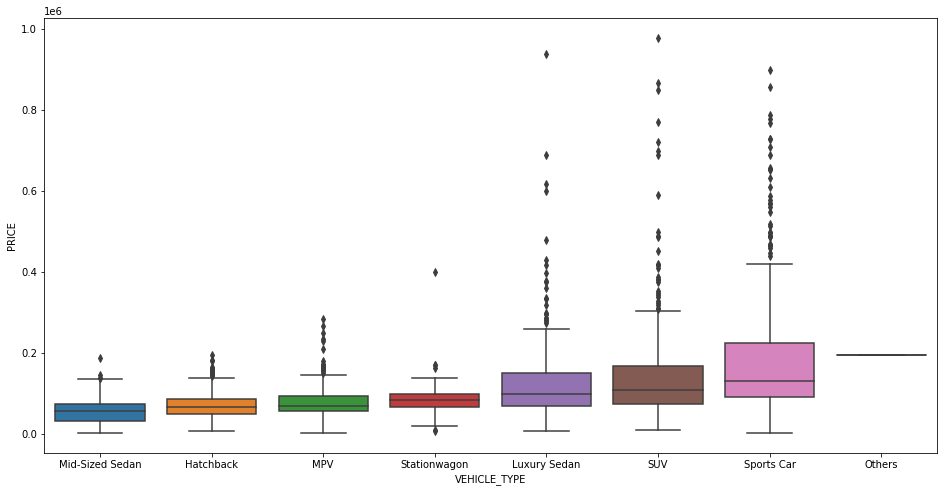

In [18]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'VEHICLE_TYPE', y = 'PRICE', data = carCatData, 
           order = carCatData.groupby('VEHICLE_TYPE')['PRICE'].median().sort_values().index)

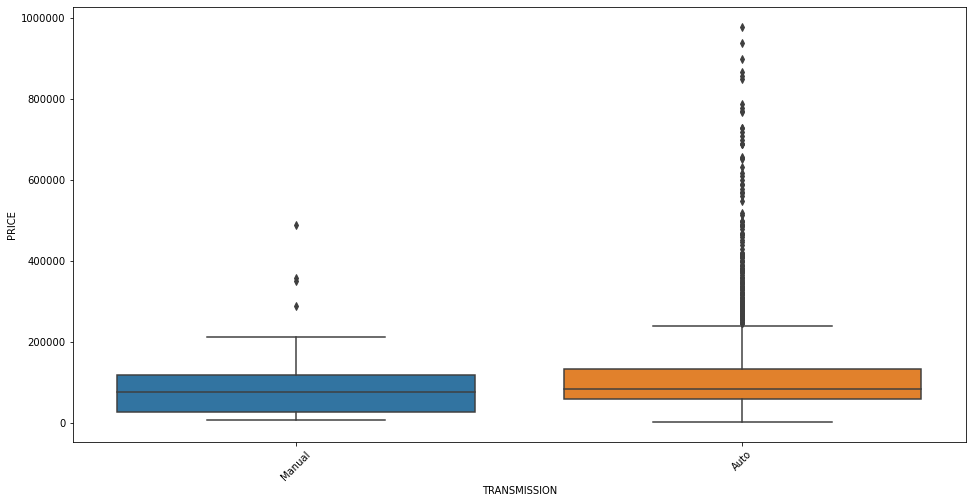

In [19]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'TRANSMISSION', y = 'PRICE', data = carCatData, 
           order = carCatData.groupby('TRANSMISSION')['PRICE'].median().sort_values().index)
plt.ticklabel_format(style='plain', axis='y') # To stop seaborn to display price as expontial
# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

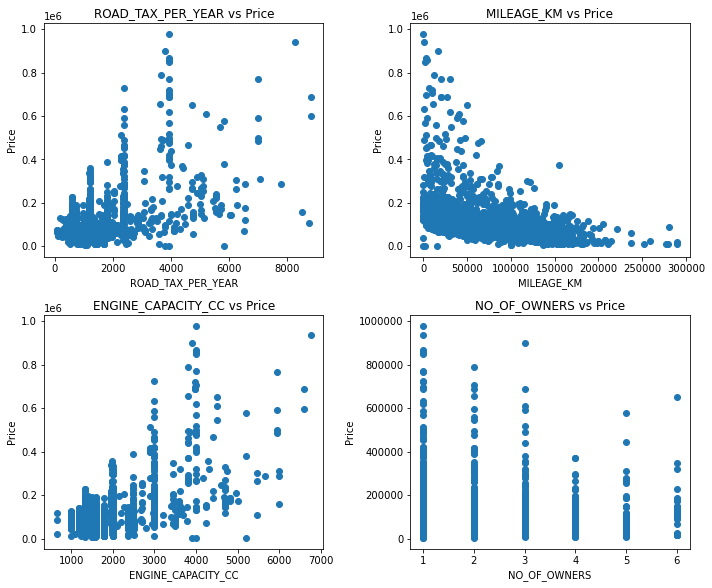

In [20]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(carDataNum[x],carDataNum['PRICE'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('ROAD_TAX_PER_YEAR', 1)
scatter('MILEAGE_KM', 2)
scatter('ENGINE_CAPACITY_CC', 3)
scatter('NO_OF_OWNERS', 4)

plt.ticklabel_format(style='plain', axis='y') # To stop seaborn to display price as expontial

plt.tight_layout()

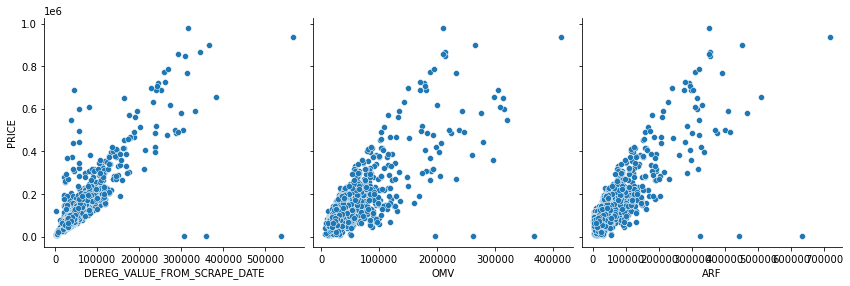

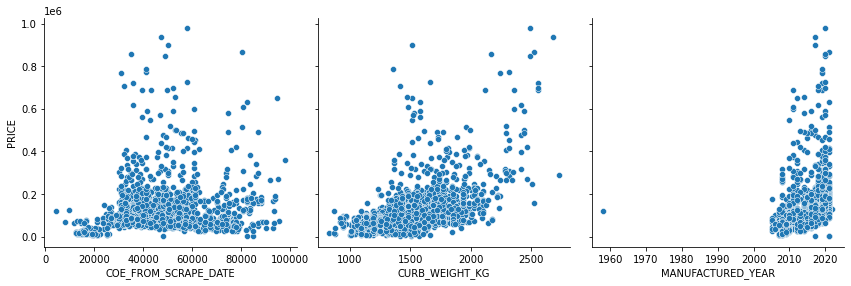

In [21]:
def pp(x,y,z):
    sb.pairplot(carData_clean, x_vars=[x,y,z], y_vars='PRICE',size=4, aspect=1, kind='scatter')
    plt.show()

pp('DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF')
pp('COE_FROM_SCRAPE_DATE', 'CURB_WEIGHT_KG', 'MANUFACTURED_YEAR')

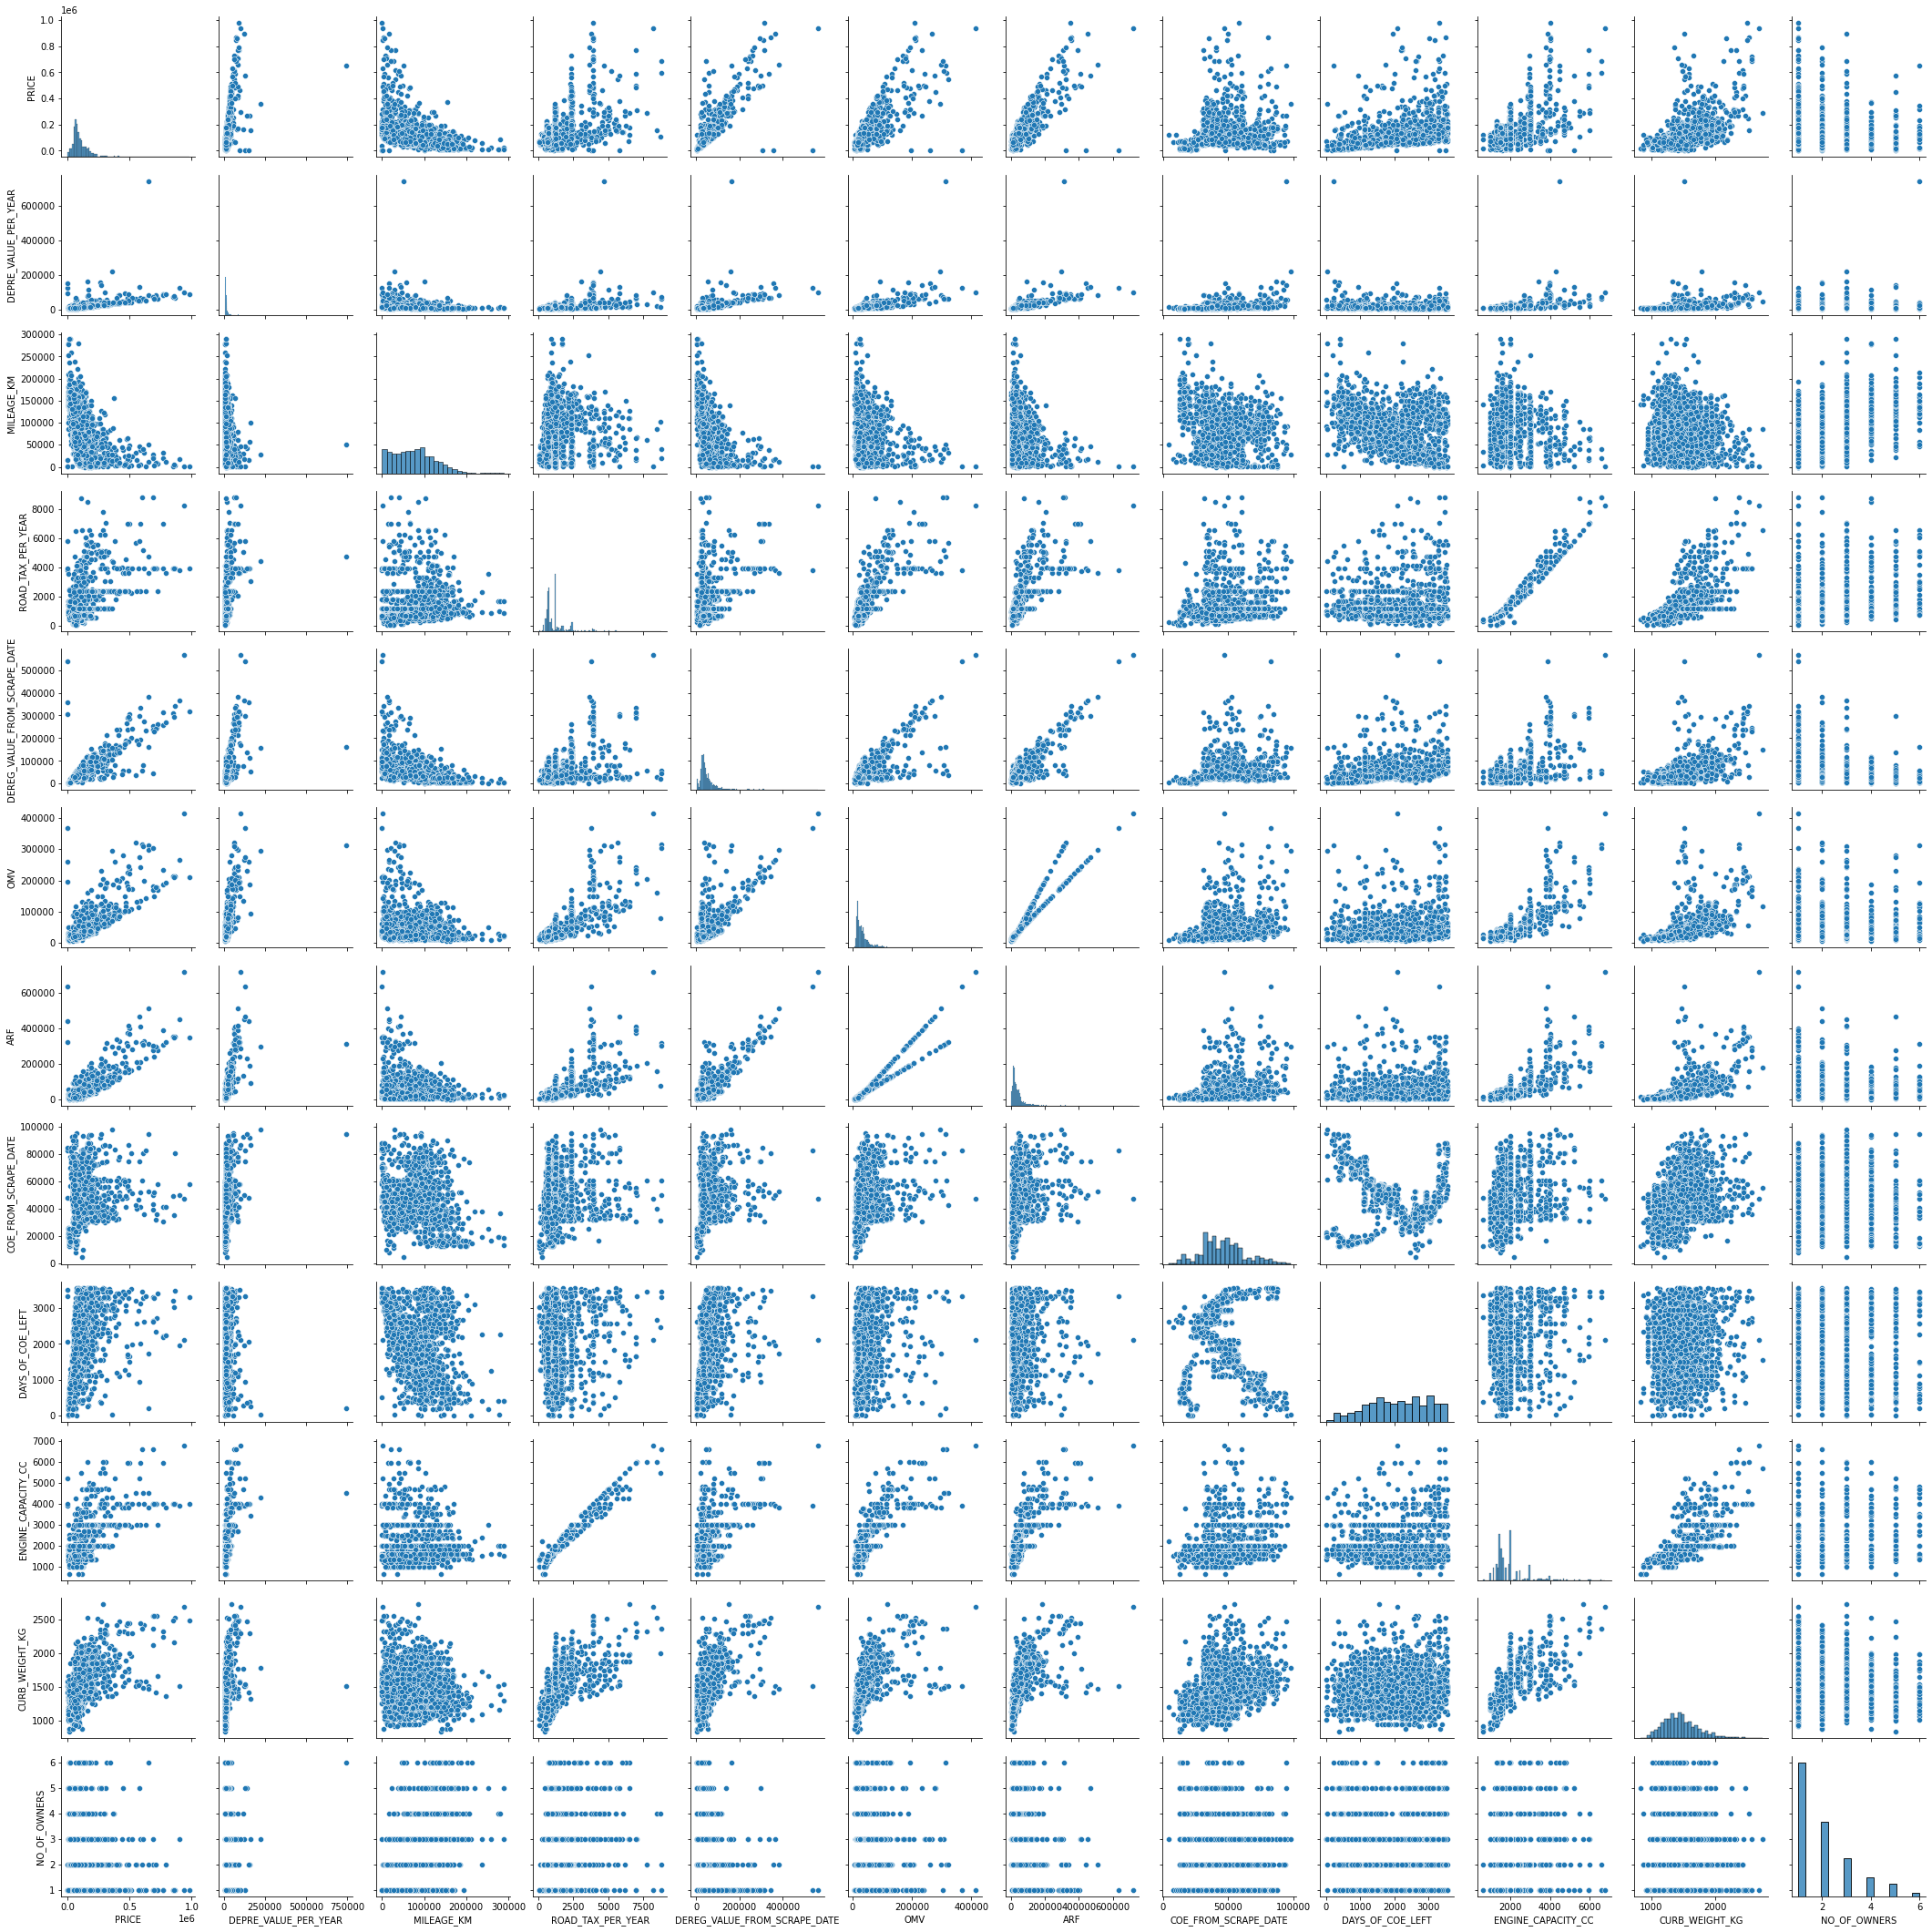

In [22]:
sb.pairplot(carDataNum)

# Machine Learning

In [23]:
car_regre = carData_clean[['ENGINE_CAPACITY_CC', 'PRICE','DEPRE_VALUE_PER_YEAR', 
                           'MILEAGE_KM', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'COE_FROM_SCRAPE_DATE', 
                           'ROAD_TAX_PER_YEAR', 'NO_OF_OWNERS', 'DAYS_OF_COE_LEFT', 'CURB_WEIGHT_KG']]
car_regre.head()

,ENGINE_CAPACITY_CC,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,DEREG_VALUE_FROM_SCRAPE_DATE,COE_FROM_SCRAPE_DATE,ROAD_TAX_PER_YEAR,NO_OF_OWNERS,DAYS_OF_COE_LEFT,CURB_WEIGHT_KG
0,1998.0,150800.0,24390.0,116000.0,76021.0,54901.0,1210.0,1.0,1704.0,2070.0
1,1198.0,43900.0,10280.0,53000.0,21826.0,45504.0,508.0,1.0,1469.0,1044.0
3,5998.0,309000.0,33870.0,67000.0,45357.0,49716.0,7074.0,3.0,3318.0,2320.0
5,1591.0,68800.0,10240.0,67362.0,32681.0,38941.0,738.0,2.0,2223.0,1295.0
9,1999.0,116800.0,19370.0,87000.0,78253.0,54920.0,1212.0,2.0,1339.0,1720.0


In [24]:
car_regre.shape

(2057, 10)

In [25]:
np.random.seed(0)
regre_x=car_regre[['DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'COE_FROM_SCRAPE_DATE', 
                   'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'NO_OF_OWNERS', 'DAYS_OF_COE_LEFT', 'CURB_WEIGHT_KG']]
regre_y=car_regre['PRICE']

# Split dataset into training set and test set
regre_x_train, regre_x_test, regre_y_train, regre_y_test = train_test_split(regre_x, regre_y, test_size=0.3) 
# 70% training and 30% test

In [26]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
lm = LinearRegression()
lm.fit(regre_x_train,regre_y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(regre_x_train, regre_y_train)

In [28]:
list(zip(regre_x_train.columns,rfe.support_,rfe.ranking_))

[('DEPRE_VALUE_PER_YEAR', True, 1),
 ('MILEAGE_KM', True, 1),
 ('DEREG_VALUE_FROM_SCRAPE_DATE', True, 1),
 ('COE_FROM_SCRAPE_DATE', True, 1),
 ('ENGINE_CAPACITY_CC', True, 1),
 ('ROAD_TAX_PER_YEAR', True, 1),
 ('NO_OF_OWNERS', True, 1),
 ('DAYS_OF_COE_LEFT', True, 1),
 ('CURB_WEIGHT_KG', True, 1)]

In [29]:
regre_x_train.columns[rfe.support_]

Index(['DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM', 'DEREG_VALUE_FROM_SCRAPE_DATE',
       'COE_FROM_SCRAPE_DATE', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR',
       'NO_OF_OWNERS', 'DAYS_OF_COE_LEFT', 'CURB_WEIGHT_KG'],
      dtype='object')

In [30]:
regre_x_train_rfe = regre_x_train[regre_x_train.columns[rfe.support_]]
regre_x_train_rfe.head()

,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,DEREG_VALUE_FROM_SCRAPE_DATE,COE_FROM_SCRAPE_DATE,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,NO_OF_OWNERS,DAYS_OF_COE_LEFT,CURB_WEIGHT_KG
611,14700.0,9998.0,59352.0,46790.0,1998.0,1210.0,1.0,2923.0,1576.0
1324,18010.0,103228.0,46166.0,67334.0,1997.0,1210.0,1.0,790.0,1615.0
1075,9680.0,19000.0,24841.0,26667.0,1317.0,578.0,1.0,2800.0,1030.0
1771,19410.0,127990.0,44506.0,77600.0,1595.0,740.0,2.0,1132.0,1425.0
572,10140.0,27000.0,44514.0,37334.0,1496.0,682.0,1.0,3102.0,1320.0


In [31]:
def build_model(regre_x,regre_y):
    X = sm.add_constant(regre_x) # Adding the constant
    lm = sm.OLS(regre_y,regre_x).fit() # fitting the model
    print(lm.summary()) # model summary
    return regre_x
    
def checkVIF(regre_x):
    vif = pd.DataFrame()
    vif['Features'] = regre_x.columns
    vif['VIF'] = [variance_inflation_factor(regre_x.values, i) for i in range(regre_x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [32]:
regre_x_train_new = build_model(regre_x_train_rfe,regre_y_train)

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              1612.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                        0.00
Time:                        12:05:58   Log-Likelihood:                         -17527.
No. Observations:                1439   AIC:                                  3.507e+04
Df Residuals:                    1430   BIC:                                  3.512e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [33]:
regre_x_train_new = regre_x_train_rfe.drop(["NO_OF_OWNERS"], axis = 1)

In [34]:
regre_x_train_new = build_model(regre_x_train_new,regre_y_train)

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              1814.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                        0.00
Time:                        12:05:58   Log-Likelihood:                         -17528.
No. Observations:                1439   AIC:                                  3.507e+04
Df Residuals:                    1431   BIC:                                  3.511e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [35]:
regre_x_train_new = regre_x_train_new.drop(["ENGINE_CAPACITY_CC"], axis = 1)

In [36]:
regre_x_train_new = build_model(regre_x_train_new,regre_y_train)

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              2074.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                        0.00
Time:                        12:05:58   Log-Likelihood:                         -17528.
No. Observations:                1439   AIC:                                  3.507e+04
Df Residuals:                    1432   BIC:                                  3.511e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [37]:
checkVIF(regre_x_train_new)

,Features,VIF
6,CURB_WEIGHT_KG,30.49
3,COE_FROM_SCRAPE_DATE,10.20
5,DAYS_OF_COE_LEFT,6.71
2,DEREG_VALUE_FROM_SCRAPE_DATE,4.95
1,MILEAGE_KM,4.49
4,ROAD_TAX_PER_YEAR,4.07
0,DEPRE_VALUE_PER_YEAR,2.37


In [38]:
regre_x_train_new = regre_x_train_new.drop(["CURB_WEIGHT_KG"], axis = 1)

In [39]:
regre_x_train_new = build_model(regre_x_train_new,regre_y_train)

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              2337.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                        0.00
Time:                        12:05:58   Log-Likelihood:                         -17551.
No. Observations:                1439   AIC:                                  3.511e+04
Df Residuals:                    1433   BIC:                                  3.515e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [40]:
regre_x_train_new = regre_x_train_new.drop(["COE_FROM_SCRAPE_DATE"], axis = 1)

In [41]:
regre_x_train_new = build_model(regre_x_train_new,regre_y_train)

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              2696.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                        0.00
Time:                        12:05:58   Log-Likelihood:                         -17577.
No. Observations:                1439   AIC:                                  3.516e+04
Df Residuals:                    1434   BIC:                                  3.519e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [42]:
lm = sm.OLS(regre_y_train,regre_x_train_new).fit()
regre_y_train_price = lm.predict(regre_x_train_new)

Text(0.5, 0, 'Errors')

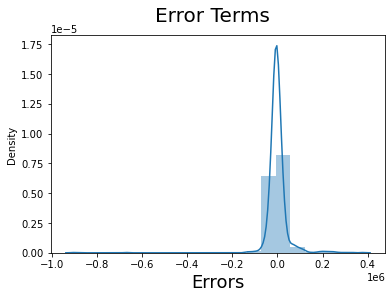

In [43]:
# Plot the histogram of the error terms
fig = plt.figure()
sb.distplot((regre_y_train - regre_y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [44]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              2696.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                        0.00
Time:                        12:05:59   Log-Likelihood:                         -17577.
No. Observations:                1439   AIC:                                  3.516e+04
Df Residuals:                    1434   BIC:                                  3.519e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [45]:
# Now let's use our model to make predictions.
regre_x_train_new = regre_x_train_new
# Creating X_test_new dataframe by dropping variables from X_test
regre_x_test_new = regre_x_test[regre_x_train_new.columns]

In [46]:
regre_y_pred = lm.predict(regre_x_test_new)

In [47]:
from sklearn.metrics import r2_score 
r2_score(regre_y_test, regre_y_pred)

0.7708061772306777

Text(0, 0.5, 'regre_y_pred')

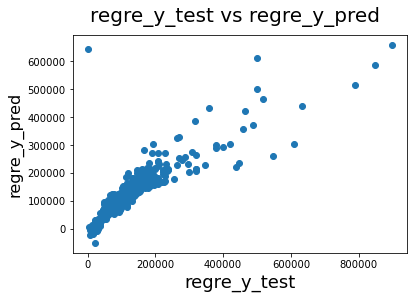

In [48]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(regre_y_test,regre_y_pred)
fig.suptitle('regre_y_test vs regre_y_pred', fontsize=20)              # Plot heading 
plt.xlabel('regre_y_test', fontsize=18)                          # X-label
plt.ylabel('regre_y_pred', fontsize=16)   

In [49]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              2696.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                        0.00
Time:                        12:05:59   Log-Likelihood:                         -17577.
No. Observations:                1439   AIC:                                  3.516e+04
Df Residuals:                    1434   BIC:                                  3.519e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------